In [1]:
#Import TF
import tensorflow as tf
print(tf.__version__)

2.0.0-dev20190731


In [2]:
#STEP 1:  LOAD IMAGES AND LABELS

#import files
##need to first prep filerename with corresponding label

#set directory
import os
os.chdir("C:\\Users\mark.fowler\OneDrive - Liverpool School of Tropical Medicine\LSTM\Machine Learning\PPF Ovaries\Images")
train_path = "./Train/"  #use working directory + ./Train/ as train_path
print(os.getcwd())

#load all images and their labels
##get name of all files in the working directory
image_files = os.listdir(train_path)


##use the open cv library for function load these images as a pixel array
import cv2
def load_image(file_path):
    return cv2.imread(file_path)


train_images = []
for file in image_files:
    img = load_image(train_path + file)
    train_images.append(img)


##function to extract label of image from file name
def extract_label(file_name):
    return 1 if "affected" in file_name else 0


train_labels = [extract_label(file) for file in image_files]

C:\Users\mark.fowler\OneDrive - Liverpool School of Tropical Medicine\LSTM\Machine Learning\PPF Ovaries\Images


267
1
1


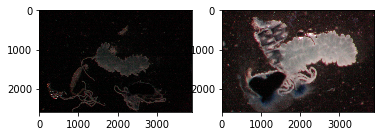

In [3]:
#Check imports
print(len(train_labels))
print(train_labels[0])
print(train_labels[85])

import matplotlib.pyplot as plt
%matplotlib inline

preview = 2000
plt.subplot(1,2,1)
plt.imshow(train_images[0])
plt.subplot(1,2,2)
plt.imshow(train_images[85])


In [4]:
#STEP 2:  PREPROCESS IMAGES

#need to prepocess images
##preprocessing involves resizing (crop to square all the same size (smallest image's dimensions) and greyscaling


def preprocess_image(img, side = 200):
    min_side = min(img.shape[0], img.shape[1])
    img = img[:min_side, :min_side]
    img = cv2.resize(img, (side,side)) #resize to "side" piuxel length - tweak
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return img / 2555.0


pro_images = []
for i in range(len(train_labels)):
    pro_images.append(preprocess_image(train_images[i]))



    



267


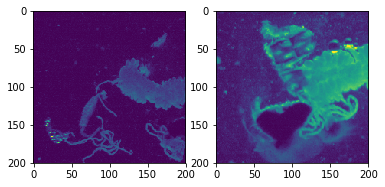

In [5]:
print(len(pro_images))

preview = 2000
plt.subplot(1,2,1)
plt.imshow(pro_images[0])
plt.subplot(1,2,2)
plt.imshow(pro_images[85])

In [6]:
#due to greyscale convert, may need to expand last dimension to be a single channel
##if not quote out expand_dims
import numpy as np

print(type(pro_images))
pro_images = np.expand_dims(pro_images, axis = -1)
pro_images = np.array(pro_images)
train_labels = np.array(train_labels)
print(pro_images.shape, train_labels.shape)

print(type(pro_images))
print(pro_images.shape[1:])

<class 'list'>
(267, 200, 200, 1) (267,)
<class 'numpy.ndarray'>
(200, 200, 1)


In [7]:
#STEP 3:  DEFINE THE NEURAL NETWORK ARCHITECTURE
np.random.seed(1234)
##use keras to create sequential model that takes in sequence of layers that transform input
## in to classifications predictions

layers = [
    #input and hidden layer
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding="same",activation=tf.nn.relu, input_shape=pro_images.shape[1:]),
    #pooling layer - 2,2 halves input
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    
    #2nd hidden layer
    #tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding="same",activation=tf.nn.relu),
    #tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    
    tf.keras.layers.Flatten(),
    #output layer - 2 nodes (normal / affected)
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)
]

##Layer types
### Dense (fully connected) 
### Convolutional - better for image data
### Pooling - placed after convolutional layer ("to down sample the detection of features in feature maps")
### Recurrent - better for time series
### Normalisation

##Activation Types - https://keras.io/activations/
### Sigmoid - between 0-1. For hidden layers. Lost popularity to relu
### relu - Rectified Linear Unit (should only be applied to the hidden layers)
### softmax - Use for output layer in Classification problem
### linear - Use for output layer in regresson problem


model = tf.keras.Sequential(layers)
model.compile(optimizer = tf.optimizers.Adam(),
             loss=tf.losses.SparseCategoricalCrossentropy(),
             metrics=[tf.metrics.SparseCategoricalAccuracy()])

##keras optimizers - https://keras.io/optimizers/
## "Use SGD+Nesterov for shallow networks, and either Adam or RMSprop for deepnets" - https://www.dlology.com/blog/quick-notes-on-how-to-choose-optimizer-in-keras/
### Adam
### SGD - Stochastic gradient descent optimizer
### AdaGrad
### RMSProp


##keras loss functions -https://keras.io/losses/
##https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/

In [8]:
#STEP 4:  TRAIN THE MODEL
np.random.seed(1234)
##call model.fit function with training data and labels and no of epochs (one iteration over all of the training data)
model.fit(pro_images, train_labels, epochs=5, batch_size=50)
#save the weights of models for predict
model.save_weights("model.tf")

W0823 10:12:24.996204 23796 deprecation.py:323] From C:\Users\mark.fowler\AppData\Roaming\Python\Python36\site-packages\tensorflow_core\python\ops\math_grad.py:1423: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0823 10:12:25.099905 23796 deprecation.py:323] From C:\Users\mark.fowler\AppData\Roaming\Python\Python36\site-packages\tensorflow_core\python\keras\optimizer_v2\optimizer_v2.py:468: BaseResourceVariable.constraint (from tensorflow.python.ops.resource_variable_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Apply a constraint manually following the optimizer update step.


Train on 267 samples
Epoch 1/5
267/267 [==============================] - 4s 15ms/sample - loss: 0.4454 - sparse_categorical_accuracy: 0.8315
Epoch 2/5
267/267 [==============================] - 4s 15ms/sample - loss: 0.1738 - sparse_categorical_accuracy: 0.9251
Epoch 3/5
267/267 [==============================] - 4s 15ms/sample - loss: 0.1068 - sparse_categorical_accuracy: 0.9401
Epoch 4/5
267/267 [==============================] - 3s 13ms/sample - loss: 0.1083 - sparse_categorical_accuracy: 0.9401
Epoch 5/5
267/267 [==============================] - 4s 14ms/sample - loss: 0.0905 - sparse_categorical_accuracy: 0.9476


In [9]:
#STEP 5:  TEST THE MODEL'S ACCURACY AGAINST TEST SET
np.random.seed(1234)
##load and preprocess test images
test_path = "./Test/"  #use working directory + ./Train/ as train_path
image_files_test = os.listdir(test_path)

test_labels = [extract_label(file) for file in image_files_test]

test_images = []
for file in image_files_test:
    img = load_image(test_path + file)
    test_images.append(img)
    

    
pro_testimages = []
for i in range(len(test_labels)):
    pro_testimages.append(preprocess_image(test_images[i]))


#create new model with saved weights
test_model = tf.keras.Sequential(layers)
test_model.load_weights("model.tf")
#get prediction probabilities (inc. code to expand dimensions to fit into algorithm)
test_predictions = test_model.predict(np.expand_dims(pro_testimages, axis = -1))

 

#measure accuracy using scikitlearn's confusion matrix
pred = []
for i in range(len(test_predictions)):
    pred.append(np.argmax(test_predictions[i]))

    
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("conf matrix", confusion_matrix(test_labels, pred))
print()
print("Report",classification_report(test_labels, pred))
print()
print(round(accuracy_score(test_labels, pred),2))

conf matrix [[ 8  0]
 [ 0 82]]

Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        82

   micro avg       1.00      1.00      1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90


1.0


In [12]:
#investigate predictions
for i in range(len(test_predictions)):
    print(np.argmax(test_predictions[i]))

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0


In [21]:
#having difficulty identifying 'normal 3'
test_predictions[81]

array([9.800653e-09, 1.000000e+00], dtype=float32)